### **Importar las librerías a utilizar**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import Ridge
import pickle
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


### **Importar los datos de la parte anterior**

In [3]:
with open("data.pkl", "rb") as f:
    X_train, X_test, y_train, y_test = pickle.load(f)

print(X_train.head(), X_test.head(), y_train.head(), y_test.head())

        Id  MSSubClass  LotFrontage  LotArea  Neighborhood  Condition1  \
87      88         160         40.0     3951      0.058904    0.863014   
1457  1458          70         66.0     9042      0.034932    0.863014   
1000  1001          20         74.0    10206      0.068493    0.863014   
1441  1442         120         69.0     4426      0.102740    0.863014   
927    928          60         69.0     9900      0.050000    0.055479   

      Condition2  OverallQual  OverallCond  YearBuilt  ...  BsmtFinType2_None  \
87      0.989726            6            5       2009  ...              False   
1457    0.989726            7            9       1941  ...              False   
1000    0.989726            3            3       1952  ...               True   
1441    0.989726            6            5       2004  ...              False   
927     0.989726            7            5       1968  ...              False   

      BsmtFinType2_Rec  BsmtFinType2_Unf  GarageType_Attchd  \
87   

### **Árbol de regresión**


===== Resultados del árbol de regresión inicial =====
R² Score: 0.8917
MAE: $19369.47
MSE: $771748437.57
RMSE: $27780.36


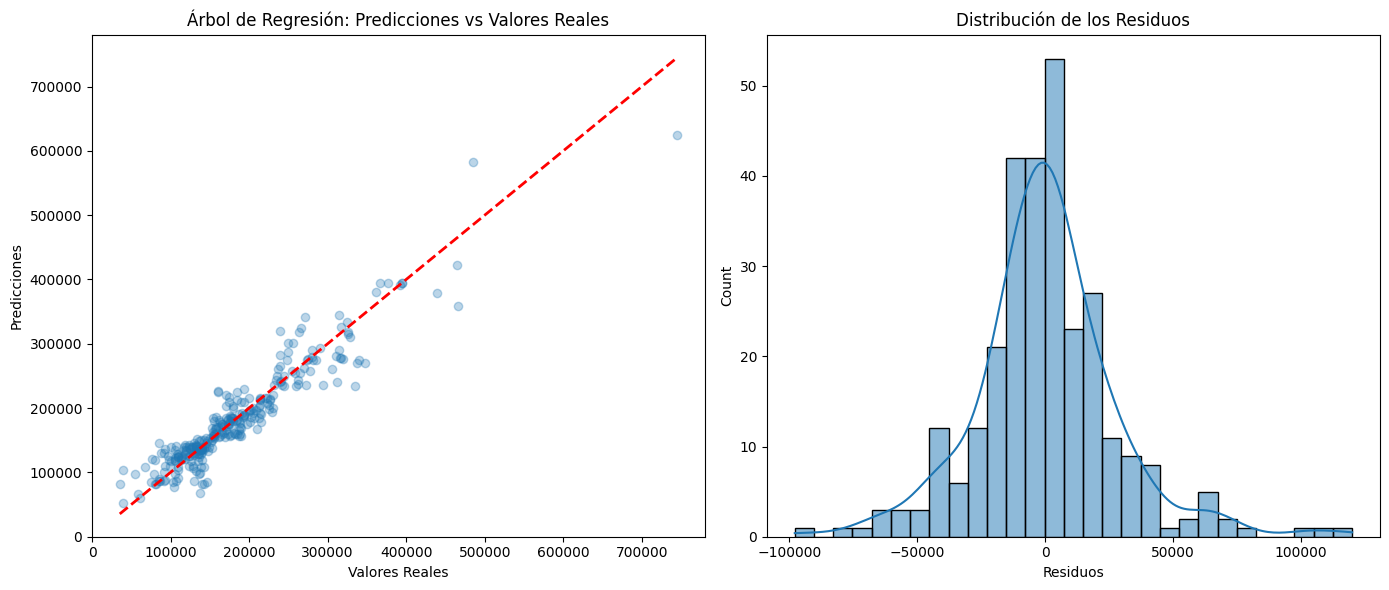

In [4]:

# Elabora un árbol de regresión para predecir el precio de las casas
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train, y_train)

# Usa el árbol para predecir y analizar resultados
y_pred_tree = tree_reg.predict(X_test)

# Calcular métricas de evaluación
r2_tree = r2_score(y_test, y_pred_tree)
mae_tree = mean_absolute_error(y_test, y_pred_tree)
mse_tree = mean_squared_error(y_test, y_pred_tree)
rmse_tree = np.sqrt(mse_tree)

print("\n===== Resultados del árbol de regresión inicial =====")
print(f"R² Score: {r2_tree:.4f}")
print(f"MAE: ${mae_tree:.2f}")
print(f"MSE: ${mse_tree:.2f}")
print(f"RMSE: ${rmse_tree:.2f}")

# Graficar los resultados
plt.figure(figsize=(14, 6))

# Gráfico de dispersión de las predicciones vs los valores reales
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_tree, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Árbol de Regresión: Predicciones vs Valores Reales')

# Histograma de los residuos
plt.subplot(1, 2, 2)
residuos = y_test - y_pred_tree
sns.histplot(residuos, kde=True)
plt.xlabel('Residuos')
plt.title('Distribución de los Residuos')

plt.tight_layout()
plt.show()

### **Otros modelos**


===== Resultados con max_depth=5 =====
R² Score: 0.8507
MAE: $20446.58
RMSE: $32610.06

===== Resultados con max_depth=10 =====
R² Score: 0.8911
MAE: $19158.32
RMSE: $27857.66

===== Resultados con max_depth=15 =====
R² Score: 0.8848
MAE: $19468.39
RMSE: $28645.05

===== Resultados con max_depth=20 =====
R² Score: 0.8749
MAE: $19498.43
RMSE: $29846.01

Resumen de modelos con diferentes profundidades:
   max_depth        r2           mae          rmse
0          5  0.850708  20446.576235  32610.060270
1         10  0.891051  19158.316681  27857.660804
2         15  0.884806  19468.392200  28645.045326
3         20  0.874944  19498.430365  29846.012002


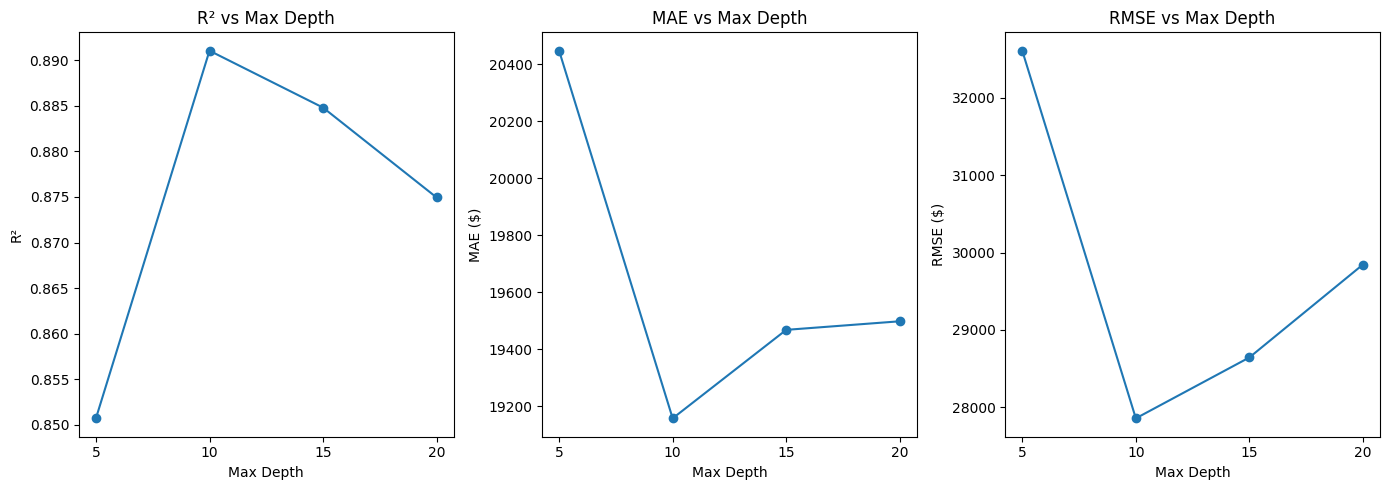


La mejor profundidad para el árbol es: 10

Variables más importantes para el árbol de regresión:
          Feature  Importance
7     OverallQual    0.467867
146       Cluster    0.417827
27       2ndFlrSF    0.022873
23    TotalBsmtSF    0.015827
29      GrLivArea    0.013945
37   TotRmsAbvGrd    0.008373
20     BsmtFinSF1    0.006166
9       YearBuilt    0.005614
32       FullBath    0.003939
3         LotArea    0.003849


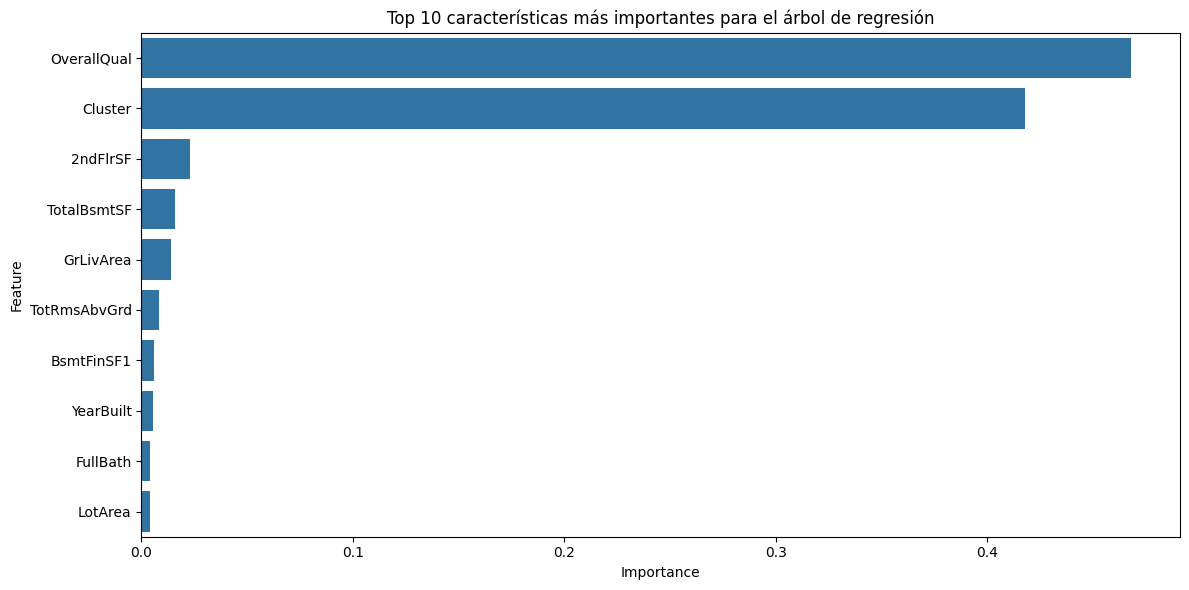

In [5]:
max_depths = [5, 10, 15, 20]  
models_results = []

for depth in max_depths:
    tree_model = DecisionTreeRegressor(max_depth=depth, random_state=42)
    tree_model.fit(X_train, y_train)
    
    # Predecir con el modelo
    y_pred = tree_model.predict(X_test)
    
    # Calcular métricas
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    # Guardar resultados
    models_results.append({
        'max_depth': depth,
        'r2': r2,
        'mae': mae,
        'rmse': rmse
    })
    
    print(f"\n===== Resultados con max_depth={depth} =====")
    print(f"R² Score: {r2:.4f}")
    print(f"MAE: ${mae:.2f}")
    print(f"RMSE: ${rmse:.2f}")

# Convertir a DataFrame para visualización
results_df = pd.DataFrame(models_results)
print("\nResumen de modelos con diferentes profundidades:")
print(results_df)

# Visualizar resultados de diferentes profundidades
plt.figure(figsize=(14, 5))

plt.subplot(1, 3, 1)
plt.plot(results_df['max_depth'].astype(str), results_df['r2'], marker='o')
plt.xlabel('Max Depth')
plt.ylabel('R²')
plt.title('R² vs Max Depth')

plt.subplot(1, 3, 2)
plt.plot(results_df['max_depth'].astype(str), results_df['mae'], marker='o')
plt.xlabel('Max Depth')
plt.ylabel('MAE ($)')
plt.title('MAE vs Max Depth')

plt.subplot(1, 3, 3)
plt.plot(results_df['max_depth'].astype(str), results_df['rmse'], marker='o')
plt.xlabel('Max Depth')
plt.ylabel('RMSE ($)')
plt.title('RMSE vs Max Depth')

plt.tight_layout()
plt.show()

# Seleccionar el mejor modelo basado en R²
best_depth = results_df.loc[results_df['r2'].idxmax(), 'max_depth']
if pd.isna(best_depth):
    best_depth = None
print(f"\nLa mejor profundidad para el árbol es: {best_depth}")

# Crear el mejor modelo
best_tree_model = DecisionTreeRegressor(max_depth=best_depth, random_state=42)
best_tree_model.fit(X_train, y_train)
y_pred_best_tree = best_tree_model.predict(X_test)

# Obtener las variables más importantes para el modelo
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': best_tree_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nVariables más importantes para el árbol de regresión:")
print(feature_importance.head(10))

# Visualizar importancia de características
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance.head(10))
plt.title('Top 10 características más importantes para el árbol de regresión')
plt.tight_layout()
plt.show()

### **Creacion Variable de Respuesta**

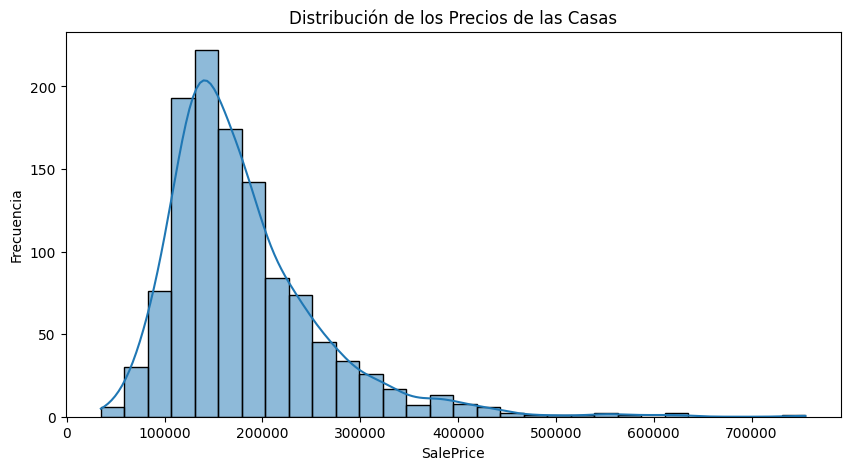

Límite Económico: 139411.00
Límite Intermedio: 189000.00
SalePrice
Cara          392
Intermedia    390
Económica     386
Name: count, dtype: int64


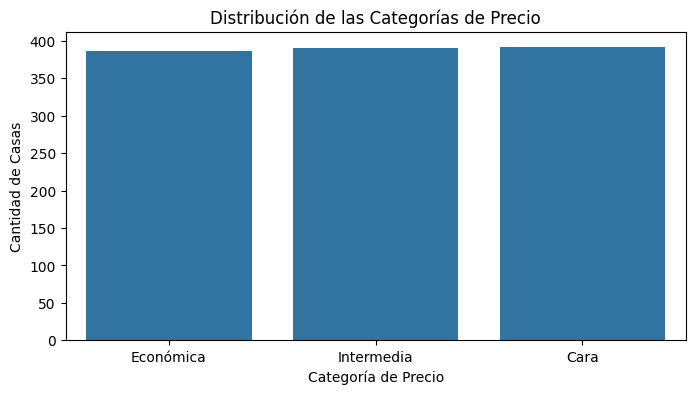

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(y_train, kde=True, bins=30)
plt.xlabel("SalePrice")
plt.ylabel("Frecuencia")
plt.title("Distribución de los Precios de las Casas")
plt.show()

# Definir los percentiles para clasificar las casas
low_threshold = y_train.quantile(0.33)  # Primer tercil (33%)
high_threshold = y_train.quantile(0.66)  # Segundo tercil (66%)

print(f"Límite Económico: {low_threshold:.2f}")
print(f"Límite Intermedio: {high_threshold:.2f}")

# Crear la variable categórica de clasificación
def categorize_price(price):
    if price <= low_threshold:
        return "Económica"
    elif price <= high_threshold:
        return "Intermedia"
    else:
        return "Cara"

y_train_class = y_train.apply(categorize_price)
y_test_class = y_test.apply(categorize_price)

print(y_train_class.value_counts())

X_train["PriceCategory"] = y_train_class
X_test["PriceCategory"] = y_test_class

plt.figure(figsize=(8, 4))
sns.countplot(x=y_train_class, order=["Económica", "Intermedia", "Cara"])
plt.xlabel("Categoría de Precio")
plt.ylabel("Cantidad de Casas")
plt.title("Distribución de las Categorías de Precio")
plt.show()


Para realizar la clasificacion, primero que nada se realizo un histograma de los precios de venta, mostrando que existe un sesgo en los precios de venta e indicando que la mayoría de las casas tienen precios relativamente bajos o intermedios, mientras que hay algunas pocas propiedades con precios significativamente más altos. Para definir los límites de cada categoría, se optó por segmentar los datos en tres grupos utilizando los terciles (percentiles 33% y 66%) de la distribución de precios. Este enfoque permite dividir las casas en partes aproximadamente iguales, asegurando que cada categoría tenga una cantidad balanceada. El primer tercil tiene un precio maximo de 139,411 siendo este el maximo de la clase "Económica" y teniendo 386 propiedades. El segundo tercil tiene un precio de 189,000 siendo el minimo de clase "Cara" y teniendo 392 propiedades. Por ultimo, la clase de precio "Intermedia" se mantiene entre el maximo de la clase "Economica" y el minimo de la clase "Cara" teniendo 390 propeidades.